In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import pylab as py
from IPython.display import Latex
#novos pacotes de imagem
import imageio
from skimage import data, io, filters
from skimage import img_as_float
from skimage.transform import radon, rescale
from skimage.morphology import reconstruction

% matplotlib inline

# Propriedades elétricas das rochas e das salmouras

Em geral existem dois tipos de condução. A codução eletrolítica e a eletrônica. 

Na condução eletrolítica o mecanismo é dependente da presença de sais dissolvidos em um solvente, como a água. 

Na condução eletrônica, não existe a presença de um solvente. Os elétrons movem-se através do meio gasoso ou sólido, como é o caso dos metais e das rochas.   


| Material          | Resistividade (Ohm-m)           |
|-------------------|---------------------------------|
|    Mármore        |    $5 \times 10^{7}$-$10^{9}$   |                                                                                       
|    Quartzo        |    $10^{12}$ - $3 \times 10^{4}$|                                                                                       
|    Petróleo       |    $2 \times 10^{14}$           |                                                                                       
| Água destilada    |    $2 \times 10^{14}$           |                                                                                       
|Água salina (15°C):|                                 |            
|      2ppm        |         $3.4$                   |
|       10          |         $0.72$                  |                                                                                       
|       20          |         $0.38$                  |                                                                                        
|       100         |         $0.09$                  |
|       200         |         $0.06$                  |
| Formações típicas:|                                 |
| Argila/folhelho   |        $2$-$10$                 |
| Água salina/areia |        $0.5$-$10$               |
| Areia oleífera    |        $5$-$10^{3}$             |
| Calcário fino     |         $10^{3}$                |


A variação de resistividade depende da concentração de sais dissolvidos nos poros das rochas. 

Por esta razão os reservatórios de petróleo contem uma condutividade mensurável.

A condutividade dos argilominerais aumenta muito na presença de um eletrólito. 

Em muitos casos a resistividade de uma rocha pode resultar da presença de aluminatos, grafitas, sulfidos, sulfatos. 

No que tange as rochas sedimentares, a condutividade é primariamente de origem eletrolítica. E os eletrólitos se movem através de condições providas por água contaminada por hidrocarbonetos dentro dos poros da rocha formanda uma única e contínua fase. 

A condutividade verdadeira depende da resistividade da água presente nos poros e da quantidade de água presente. Em uma escala menor ela dependerá da litologia, da matriz da rocha e conteúdo de argila e da sua textura. E dependerá fortemente da temperatura.  

A resistividade depende inversamente da concentração do portador da carga. Em outras palavras

$$ \rho \propto \dfrac{1}{n q^{2} \mu} $$ 

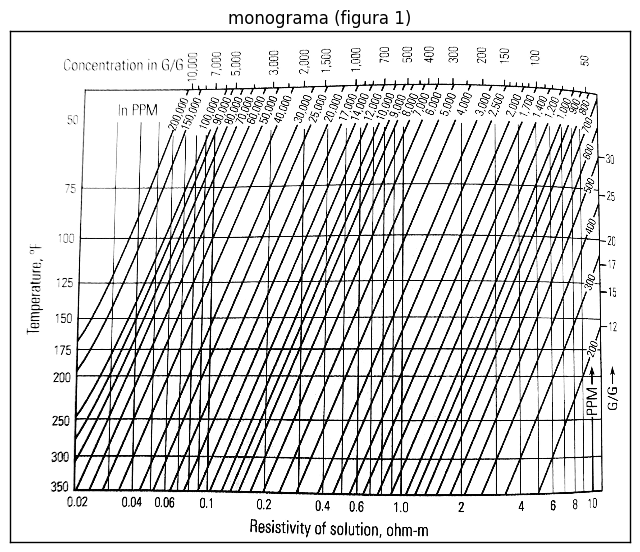

In [5]:
monograma = io.imread( "Imagens/sp4.jpg")
py.rcParams['figure.figsize'] = (8.0, 8.0)
plt.title("monograma (figura 1)")
fig = plt.imshow(monograma)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

É notável através do gráfico da figura 1 como a concentração de NaCl em águas salinas muda o valor de resistividade ($\rho$). 

Note, por exemplo, qual seria o valor da resistividade de uma amostra salina com concentrações entre $4 000$ e $40 000$ ppm de NaCl a uma temperatura de $100$°F?

Respectivamente $\color{red}{0,12\%}$ e $\color{red}{1,0\%}$ ohm-m. 

## Dependência da temperatura nas medidas de resistividade

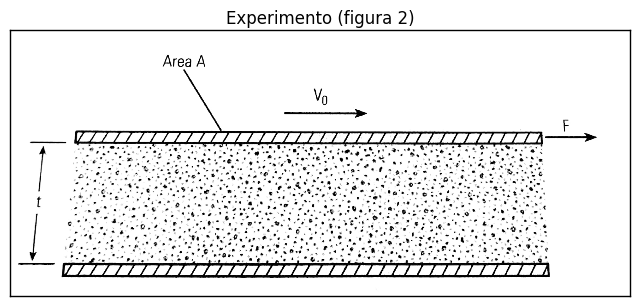

In [3]:
experimento = io.imread( "Imagens/sp5.jpg")
py.rcParams['figure.figsize'] = (8.0, 8.0)
plt.title("Experimento (figura 2)")
fig = plt.imshow(experimento)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

O experimento da figura 2 mostra a relação entre a temperatura e a resistividade. Um filme líquido de espessura $t$ é contido entre duas placas de área $A$. A placa de baixo é fixa e a placa de cima aplica uma força $F$ de diração e sentido paralelo à placa de baixo. Experimentalmente, a força $F$ necessária para que o filme líquido atinja uma velocidade $v_{0}$ é diretamente proporcial a área da placa que está sendo movimentada $A$, e inversamente proporcional a espessura do filme $t$. A contante de proporcionalidade $\eta$ é chamada de viscosidade e a relação experimental é espressa como

$$F=\eta \frac{v_{0}A}{t}$$ (Eq. 1)

A lei de Stokes prevê a força aplicada sob um objeto esférico de raio $a$, conhecido como raio de Stokes.

$$F= 6\pi \eta a v $$ (Eq. 2)

onde v é a velocidade do objeto. No caso específico as esferas representam as partículas eletrolíticas em solução. 

Através da análise da resistividade do movimento de um gás ionizado demonstrado no notebook anterior foi demostrado como a mobilidade, $\mu$, entra na espressão final.

$$v_{drift} = \mu F \rightarrow R = \dfrac{1}{n \mu q^{2}}\dfrac{l}{A}$$ (Eq. 3)

Considerando uma partícula eletrolítica como tendo o raio de Stokes, a velocidade de deriva pode ser reescrita como:

$$v_{drift} = \dfrac{1}{6 \pi \eta a } F$$ (Eq. 4)

E a resistividade 

$$ R= \dfrac{6 \pi \eta a}{n q^{2}} \dfrac{l}{A} $$ (Eq. 5)

Portanto a dependência que a resistividade tem da temperatura vem justamente do fator de viscosidade do líquido, ao contrário da experiência com o gás ionizado. A resistividade diminui com o aumento da temperatura.   

No caso de um líquido, a viscosidade é o resultado de forças intermoleculares fortes que impedem o movimento relativo nas camadas do flúido. A medida que a temperatura aumenta, a energia cinética das moléculas passa a sobrepujar a energia presente nas forças intermoleculares levando a uma queda da viscosidade.  

Experimentalmente a dependência da viscosidade para muitos líquidos pode ser descrita como 

$$\eta=\eta_{0} e^{\frac{C}{T}}$$

Aonde C é uma característica do flúido. 

A lei de Stokes refere-se à força de fricção experimentada por objetos esféricos que se movem no seio de um fluido viscoso, num regime laminar de números de Reynolds de valores baixos. Foi derivada em 1851 por George Gabriel Stokes depois de resolver um caso particular das equações de Navier-Stokes. De maneira geral, a lei de Stokes é válida para o movimento de partículas esféricas pequenas, movendo-se a velocidades baixas.